In [1]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt

In [2]:
os.listdir('data')

['two_data.csv',
 'fit_results_run_30404_no_avg.txt',
 '.ipynb_checkpoints',
 'fit_results_run_30413_no_avg.txt']

In [3]:
root_path = 'data'
listfiles = ['/'.join([root_path, f]) for f in os.listdir(root_path) if ('.csv' not in f) & ('ipynb' not in f)]
listfiles

['data/fit_results_run_30404_no_avg.txt',
 'data/fit_results_run_30413_no_avg.txt']

In [4]:
data1 = pd.read_csv(listfiles[0], sep='\t')
data1.head()

,#Ch. #,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,E(k4),k5,E(k5),k6,E(k6),Chi2/DOF
0,0,5.168380,0.016480,63551.21586,457.255779,2.005194,0.011204,0.084885,0.016731,0.083182,0.007405,0.084845,0.017068,0.083149,0.007296,8.314216
1,1,5.125260,0.016402,64050.18259,453.216645,1.982492,0.010483,0.076184,0.002083,0.082611,0.002288,-0.168491,0.000001,-0.168490,0.000001,6.624724
2,2,5.126215,0.016700,63789.33173,450.512634,2.051578,0.011507,0.128736,0.002802,0.144325,0.002418,0.128579,0.002794,0.115445,0.001615,3.475155
3,3,5.126688,0.017194,63692.52284,455.249167,1.971281,0.011576,0.093918,0.037538,0.136646,0.003721,0.093917,0.037537,0.058203,0.001226,5.964010
4,4,5.055860,0.022534,74734.46744,16428.503940,2.233869,0.024320,0.972904,0.066550,1.267541,0.075325,0.026909,0.004198,0.025164,0.004034,2.673853


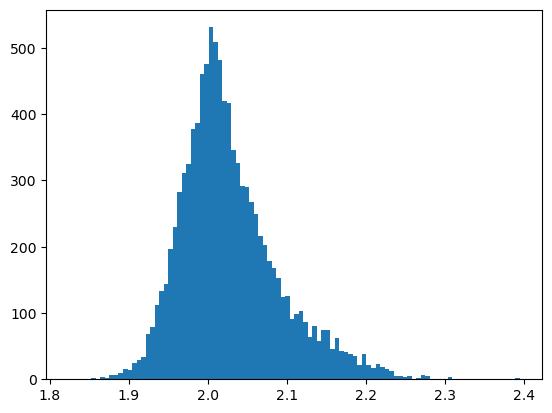

Mean t_p = 2.0275726099015623


In [8]:
plt.figure()
plt.hist(data1[' t_p '], bins=100)
plt.show()
print(f'Mean t_p = {np.mean(data1[' t_p '])}')

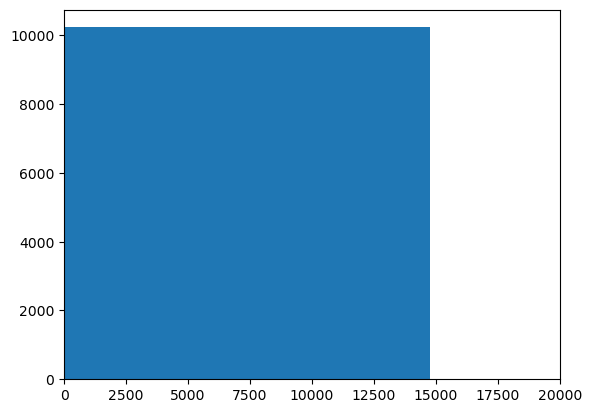

1475035.177

In [24]:
plt.figure()
plt.hist(data1[' k3 '], bins=100)
plt.xlim([0, 20000])
plt.show()
np.max(data1[' k3 '])

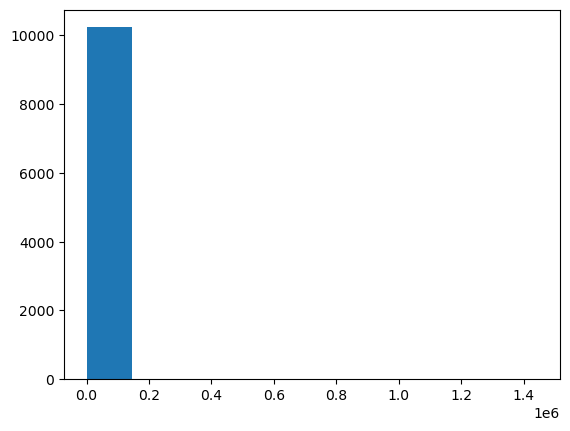

In [14]:
plt.figure()
plt.hist(data1[' k4 '])
plt.show()

In [41]:
columns = [c for c in data1.columns if 'Ch' not in c]
columns

[' t ',
 ' E(t) ',
 ' A_0 ',
 ' E(A_0) ',
 ' t_p ',
 ' E(t_p) ',
 ' k3 ',
 ' E(k3) ',
 ' k4 ',
 ' E(k4) ',
 ' k5 ',
 ' E(k5) ',
 ' k6 ',
 ' E(k6) ']

* If k3=k4 and k5=k6 : ideal electronic response
* If k3 > k4: overshoot (positive tail)
* If k3 < k4: undershoot (negative tail)
* If k4=k6: singularity <br/>
  **k5 and k6 also control the overshoot and undershoot in similar way as k3 and k4**
* If k5 > k6: overshoot
* If k5 < k6 : undershoot

In [42]:
def isIdeal(k3, k4, k5, k6):
    return (k3==k4) & (k5==k6)

def isOvershoot(k3,k4,k5,k6):
    return (k3>k4)# | (k5>k6)

def isUndershoot(k3,k4,k5,k6):
    return (k3<k4)# | (k5<k6)

def isSingularity(k4,k6):
    return (k4==k6)

In [43]:
# k3, k4, k5, k6 = data1[' k3 '], data1[' k4 '], data1[' k5 '], data1[' k6 ']
def get_k3_k4_k5_k6(data):
    return data[' k3 '], data[' k4 '], data[' k5 '], data[' k6 ']
k3,k4,k5,k6 = get_k3_k4_k5_k6(data=data1)

In [44]:
data1['Overshoot'] = isOvershoot(k3,k4,k5,k6)
data1['Undershoot'] = isUndershoot(k3,k4,k5,k6)
data1['Ideal'] = isIdeal(k3,k4,k5,k6)
data1['Singularity'] = isSingularity(k4,k6)

In [45]:
data1

,#Ch. #,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,E(k4),k5,E(k5),k6,E(k6),Chi2/DOF,Overshoot,Undershoot,Ideal,Singularity
0,0,5.168380,0.016480,63551.21586,457.255779,2.005194,0.011204,0.084885,0.016731,0.083182,0.007405,0.084845,0.017068,0.083149,0.007296,8.314216,True,False,False,False
1,1,5.125260,0.016402,64050.18259,453.216645,1.982492,0.010483,0.076184,0.002083,0.082611,0.002288,-0.168491,0.000001,-0.168490,0.000001,6.624724,False,True,False,False
2,2,5.126215,0.016700,63789.33173,450.512634,2.051578,0.011507,0.128736,0.002802,0.144325,0.002418,0.128579,0.002794,0.115445,0.001615,3.475155,False,True,False,False
3,3,5.126688,0.017194,63692.52284,455.249167,1.971281,0.011576,0.093918,0.037538,0.136646,0.003721,0.093917,0.037537,0.058203,0.001226,5.964010,False,True,False,False
4,4,5.055860,0.022534,74734.46744,16428.503940,2.233869,0.024320,0.972904,0.066550,1.267541,0.075325,0.026909,0.004198,0.025164,0.004034,2.673853,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,10235,5.110990,0.017476,63740.57961,459.327304,2.056906,0.012002,0.190113,0.022634,0.187476,0.022260,0.007136,0.005329,0.007521,0.005399,4.148674,True,False,False,False
10236,10236,5.115046,0.017754,61761.52320,450.472879,2.122625,0.012652,0.163071,0.003685,0.123030,0.009457,0.089594,0.001700,0.123001,0.009467,3.084609,True,False,False,False
10237,10237,5.100197,0.016997,63260.65863,446.988529,2.073044,0.011449,0.015407,0.000381,0.026369,0.000289,0.015660,0.000383,0.008133,0.000243,3.292299,False,True,False,False
10238,10238,5.024236,0.017319,62670.09031,421.501712,2.241926,0.011938,0.044526,0.000817,0.054167,0.001068,0.044527,0.000743,0.054165,0.001212,13.055916,False,True,False,False


In [46]:
data2 = pd.read_csv(listfiles[1], sep='\t')
k3,k4,k5,k6 = get_k3_k4_k5_k6(data=data2)
data2['Overshoot'] = isOvershoot(k3,k4,k5,k6)
data2['Undershoot'] = isUndershoot(k3,k4,k5,k6)
data2['Ideal'] = isIdeal(k3,k4,k5,k6)
data2['Singularity'] = isSingularity(k4,k6)

In [47]:
data2

,#Ch. #,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,E(k4),k5,E(k5),k6,E(k6),Chi2/DOF,Overshoot,Undershoot,Ideal,Singularity
0,0,5.168504,0.015292,76019.65987,502.926458,1.996457,0.010724,0.189659,0.016486,0.183282,1.593705e-02,0.054743,8.022267e-03,0.053374,0.007710,10.852992,True,False,False,False
1,1,5.201712,0.015230,76502.38864,502.662940,1.882698,0.010941,0.201669,0.005129,0.145001,2.894976e-03,0.103429,1.922616e-03,0.144970,0.002895,17.914787,True,False,False,False
2,2,5.145413,0.015085,76387.11533,503.012738,2.026476,0.010153,0.047390,0.000504,-0.163461,5.784610e-07,-0.163463,5.763503e-07,0.046299,0.000494,7.366682,True,False,False,False
3,3,5.050673,0.021660,77635.26916,580.609145,2.067295,0.021566,0.061166,0.002246,0.409090,3.686406e-02,0.352936,2.978890e-02,0.050686,0.001694,5.471534,False,True,False,False
4,4,5.122154,0.015847,76164.76043,499.180938,2.053769,0.011067,0.111778,0.050365,0.137977,7.322494e-03,0.111804,5.038159e-02,0.087051,0.003160,5.577157,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,10235,5.101184,0.015606,76216.71273,493.706403,2.068169,0.010576,0.052520,0.000635,0.059161,5.586421e-04,0.050288,6.112439e-04,0.044591,0.000453,3.960262,False,True,False,False
10236,10236,5.092284,0.016012,74529.32006,485.433216,2.151517,0.011246,-0.122913,0.000001,0.046218,4.696350e-04,0.043957,4.502486e-04,-0.122915,0.000001,3.615962,False,True,False,False
10237,10237,5.109026,0.015401,75761.00213,489.494351,2.060611,0.010334,0.014339,0.000353,0.029083,3.437016e-04,0.021926,4.260000e-04,0.010108,0.000264,3.600842,False,True,False,False
10238,10238,5.040453,0.016358,75351.59727,483.226248,2.216201,0.011431,0.017719,0.001247,0.044592,1.441291e-03,0.017691,1.243443e-03,0.006902,0.001319,4.925204,False,True,False,False


In [48]:
data = pd.concat([data1, data2], axis=0)

In [49]:
data.shape, data1.shape, data2.shape

((20480, 20), (10240, 20), (10240, 20))

In [50]:
data

,#Ch. #,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,E(k4),k5,E(k5),k6,E(k6),Chi2/DOF,Overshoot,Undershoot,Ideal,Singularity
0,0,5.168380,0.016480,63551.21586,457.255779,2.005194,0.011204,0.084885,0.016731,0.083182,0.007405,0.084845,0.017068,0.083149,0.007296,8.314216,True,False,False,False
1,1,5.125260,0.016402,64050.18259,453.216645,1.982492,0.010483,0.076184,0.002083,0.082611,0.002288,-0.168491,0.000001,-0.168490,0.000001,6.624724,False,True,False,False
2,2,5.126215,0.016700,63789.33173,450.512634,2.051578,0.011507,0.128736,0.002802,0.144325,0.002418,0.128579,0.002794,0.115445,0.001615,3.475155,False,True,False,False
3,3,5.126688,0.017194,63692.52284,455.249167,1.971281,0.011576,0.093918,0.037538,0.136646,0.003721,0.093917,0.037537,0.058203,0.001226,5.964010,False,True,False,False
4,4,5.055860,0.022534,74734.46744,16428.503940,2.233869,0.024320,0.972904,0.066550,1.267541,0.075325,0.026909,0.004198,0.025164,0.004034,2.673853,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,10235,5.101184,0.015606,76216.71273,493.706403,2.068169,0.010576,0.052520,0.000635,0.059161,0.000559,0.050288,0.000611,0.044591,0.000453,3.960262,False,True,False,False
10236,10236,5.092284,0.016012,74529.32006,485.433216,2.151517,0.011246,-0.122913,0.000001,0.046218,0.000470,0.043957,0.000450,-0.122915,0.000001,3.615962,False,True,False,False
10237,10237,5.109026,0.015401,75761.00213,489.494351,2.060611,0.010334,0.014339,0.000353,0.029083,0.000344,0.021926,0.000426,0.010108,0.000264,3.600842,False,True,False,False
10238,10238,5.040453,0.016358,75351.59727,483.226248,2.216201,0.011431,0.017719,0.001247,0.044592,0.001441,0.017691,0.001243,0.006902,0.001319,4.925204,False,True,False,False


In [51]:
data3 = data.reset_index().drop('index', axis=1).copy()

In [52]:
data3

,#Ch. #,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,E(k4),k5,E(k5),k6,E(k6),Chi2/DOF,Overshoot,Undershoot,Ideal,Singularity
0,0,5.168380,0.016480,63551.21586,457.255779,2.005194,0.011204,0.084885,0.016731,0.083182,0.007405,0.084845,0.017068,0.083149,0.007296,8.314216,True,False,False,False
1,1,5.125260,0.016402,64050.18259,453.216645,1.982492,0.010483,0.076184,0.002083,0.082611,0.002288,-0.168491,0.000001,-0.168490,0.000001,6.624724,False,True,False,False
2,2,5.126215,0.016700,63789.33173,450.512634,2.051578,0.011507,0.128736,0.002802,0.144325,0.002418,0.128579,0.002794,0.115445,0.001615,3.475155,False,True,False,False
3,3,5.126688,0.017194,63692.52284,455.249167,1.971281,0.011576,0.093918,0.037538,0.136646,0.003721,0.093917,0.037537,0.058203,0.001226,5.964010,False,True,False,False
4,4,5.055860,0.022534,74734.46744,16428.503940,2.233869,0.024320,0.972904,0.066550,1.267541,0.075325,0.026909,0.004198,0.025164,0.004034,2.673853,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20475,10235,5.101184,0.015606,76216.71273,493.706403,2.068169,0.010576,0.052520,0.000635,0.059161,0.000559,0.050288,0.000611,0.044591,0.000453,3.960262,False,True,False,False
20476,10236,5.092284,0.016012,74529.32006,485.433216,2.151517,0.011246,-0.122913,0.000001,0.046218,0.000470,0.043957,0.000450,-0.122915,0.000001,3.615962,False,True,False,False
20477,10237,5.109026,0.015401,75761.00213,489.494351,2.060611,0.010334,0.014339,0.000353,0.029083,0.000344,0.021926,0.000426,0.010108,0.000264,3.600842,False,True,False,False
20478,10238,5.040453,0.016358,75351.59727,483.226248,2.216201,0.011431,0.017719,0.001247,0.044592,0.001441,0.017691,0.001243,0.006902,0.001319,4.925204,False,True,False,False


In [53]:
data3.to_csv('data/two_data.csv', index=False)

In [54]:
True in data3['Ideal']

False

-------------------
### Training an XGBoost for classification

In [55]:
data = data3.copy()

In [56]:
mapVal = {True: 1, False: 0}

In [57]:
data['Overshoot'] = data['Overshoot'].map(mapVal)
data['Undershoot'] = data['Undershoot'].map(mapVal)
data['Ideal'] = data['Ideal'].map(mapVal)
data['Singularity'] = data['Singularity'].map(mapVal)

In [58]:
new_data = data.iloc[-100:].copy()
data = data[:-100].copy()

In [87]:
import xgboost as xgb
from xgboost import XGBRegressor  # for regression
from xgboost import XGBClassifier # for classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# Prepare your data
targets = ['Overshoot', 'Undershoot', 'Ideal', 'Singularity']
X = data.drop(targets, axis=1)
y = data[targets]

# First split: separate test set (20% of total data)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42
)

# Second split: divide remaining data into train and validation (80% train, 20% validation of remaining data)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.2,
    random_state=42
)

# Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'max_depth': 2,
    'learning_rate': 0.05,
    'objective': 'binary:logistic',  # for classification
    # 'objective': 'reg:squarederror',  # for regression
    'eval_metric': 'logloss'  # works here with train()
}

# Specify evaluation sets
evals = [(dtrain, 'train'), (dval, 'validation')]


In [88]:
# Train model
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=True
)

[0]	train-logloss:0.53301	validation-logloss:0.53294
[1]	train-logloss:0.50640	validation-logloss:0.50615
[2]	train-logloss:0.48281	validation-logloss:0.48239
[3]	train-logloss:0.46149	validation-logloss:0.46106
[4]	train-logloss:0.44232	validation-logloss:0.44164
[5]	train-logloss:0.42460	validation-logloss:0.42406
[6]	train-logloss:0.40852	validation-logloss:0.40785
[7]	train-logloss:0.39375	validation-logloss:0.39322
[8]	train-logloss:0.38000	validation-logloss:0.37938
[9]	train-logloss:0.36743	validation-logloss:0.36685
[10]	train-logloss:0.35572	validation-logloss:0.35487
[11]	train-logloss:0.34483	validation-logloss:0.34404
[12]	train-logloss:0.33475	validation-logloss:0.33393
[13]	train-logloss:0.32530	validation-logloss:0.32449
[14]	train-logloss:0.31639	validation-logloss:0.31534
[15]	train-logloss:0.30814	validation-logloss:0.30721
[16]	train-logloss:0.30036	validation-logloss:0.29928
[17]	train-logloss:0.29306	validation-logloss:0.29201
[18]	train-logloss:0.28620	validation-

In [61]:
# Make predictions
preds = model.predict(dtest)

In [62]:
preds

array([[0.18077374, 0.84833795, 0.00187068, 0.00187146],
       [0.845187  , 0.14112882, 0.00187068, 0.00187146],
       [0.95595026, 0.03409967, 0.00187068, 0.00187146],
       ...,
       [0.1769706 , 0.82241386, 0.00187068, 0.00187146],
       [0.94161457, 0.05317744, 0.00187068, 0.00187146],
       [0.75535434, 0.22175194, 0.00187068, 0.00187146]], dtype=float32)

In [63]:
# Convert predictions to DataFrame with named columns
columns = ['Overshoot', 'Undershoot', 'Ideal', 'Singularity']
pred_df = pd.DataFrame(preds, columns=columns)

In [64]:
pred_df

,Overshoot,Undershoot,Ideal,Singularity
0,0.180774,0.848338,0.001871,0.001871
1,0.845187,0.141129,0.001871,0.001871
2,0.955950,0.034100,0.001871,0.001871
3,0.252970,0.777758,0.001871,0.001871
4,0.942393,0.044958,0.001871,0.001871
...,...,...,...,...
4071,0.986677,0.009266,0.001871,0.001871
4072,0.822277,0.164649,0.001871,0.001871
4073,0.176971,0.822414,0.001871,0.001871
4074,0.941615,0.053177,0.001871,0.001871


In [65]:
pred_df['predicted_class'] = pred_df.idxmax(axis=1)
pred_df

,Overshoot,Undershoot,Ideal,Singularity,predicted_class
0,0.180774,0.848338,0.001871,0.001871,Undershoot
1,0.845187,0.141129,0.001871,0.001871,Overshoot
2,0.955950,0.034100,0.001871,0.001871,Overshoot
3,0.252970,0.777758,0.001871,0.001871,Undershoot
4,0.942393,0.044958,0.001871,0.001871,Overshoot
...,...,...,...,...,...
4071,0.986677,0.009266,0.001871,0.001871,Overshoot
4072,0.822277,0.164649,0.001871,0.001871,Overshoot
4073,0.176971,0.822414,0.001871,0.001871,Undershoot
4074,0.941615,0.053177,0.001871,0.001871,Overshoot


In [66]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data = test_data.rename(columns={
    'Overshoot': 'Overshoot_true',
    'Undershoot': 'Undershoot_true',
    'Ideal': 'Ideal_true',
    'Singularity': 'Singularity_true'
})

In [67]:
test_data

,#Ch. #,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,E(k4),k5,E(k5),k6,E(k6),Chi2/DOF,Overshoot_true,Undershoot_true,Ideal_true,Singularity_true
7584,7584,5.101745,0.017396,60435.86458,438.595282,2.023731,0.011163,0.068190,0.004405,0.072741,3.783243e-03,0.068189,4.403907e-03,0.072759,0.003772,11.637218,0,1,0,0
6480,6480,5.138461,0.017144,62029.49245,450.449034,2.071144,0.011807,-0.065673,0.002332,-0.066598,2.540115e-03,-0.072302,1.975027e-03,-0.071524,0.002194,3.137890,1,0,0,0
13396,3156,5.148861,0.015632,74002.38288,490.158252,1.974940,0.010450,0.118572,0.006453,0.097022,5.011688e-03,0.078015,4.028300e-03,0.097035,0.005010,4.627617,1,0,0,0
13641,3401,5.109413,0.015801,75500.69206,496.626404,1.994865,0.010237,0.071237,0.002380,0.072847,2.446428e-03,0.071236,2.369438e-03,0.072837,0.002435,8.285286,0,1,0,0
6355,6355,5.155501,0.017021,62758.12880,457.578289,1.997876,0.011761,0.136235,0.006082,0.107993,4.511688e-03,0.087185,3.610565e-03,0.107958,0.004521,7.189500,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11355,1115,5.158017,0.015229,77688.41981,506.490264,1.959540,0.010336,0.108760,0.007736,-0.179423,3.561900e-08,-0.179424,3.571088e-08,0.103836,0.007226,8.266373,1,0,0,0
4772,4772,5.128720,0.017882,62637.37080,464.392323,2.003404,0.013207,0.400026,0.062081,0.393809,6.000021e-02,0.015409,4.512926e-03,0.015999,0.004579,4.439703,1,0,0,0
1767,1767,5.114088,0.017326,63808.53831,454.961139,2.053347,0.011769,0.070035,0.000078,0.076420,1.062396e-03,0.069430,7.238127e-05,0.062566,0.000894,8.160397,0,1,0,0
16606,6366,5.144975,0.015891,74322.26544,499.613303,1.990494,0.011134,0.192240,0.013776,0.159560,1.835325e-02,0.132998,8.824599e-03,0.159525,0.018365,10.361767,1,0,0,0


In [68]:
test_data = pd.concat([test_data.reset_index(), pred_df], axis=1)

In [69]:
test_data

,index,#Ch. #,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),...,Chi2/DOF,Overshoot_true,Undershoot_true,Ideal_true,Singularity_true,Overshoot,Undershoot,Ideal,Singularity,predicted_class
0,7584,7584,5.101745,0.017396,60435.86458,438.595282,2.023731,0.011163,0.068190,0.004405,...,11.637218,0,1,0,0,0.180774,0.848338,0.001871,0.001871,Undershoot
1,6480,6480,5.138461,0.017144,62029.49245,450.449034,2.071144,0.011807,-0.065673,0.002332,...,3.137890,1,0,0,0,0.845187,0.141129,0.001871,0.001871,Overshoot
2,13396,3156,5.148861,0.015632,74002.38288,490.158252,1.974940,0.010450,0.118572,0.006453,...,4.627617,1,0,0,0,0.955950,0.034100,0.001871,0.001871,Overshoot
3,13641,3401,5.109413,0.015801,75500.69206,496.626404,1.994865,0.010237,0.071237,0.002380,...,8.285286,0,1,0,0,0.252970,0.777758,0.001871,0.001871,Undershoot
4,6355,6355,5.155501,0.017021,62758.12880,457.578289,1.997876,0.011761,0.136235,0.006082,...,7.189500,1,0,0,0,0.942393,0.044958,0.001871,0.001871,Overshoot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,11355,1115,5.158017,0.015229,77688.41981,506.490264,1.959540,0.010336,0.108760,0.007736,...,8.266373,1,0,0,0,0.986677,0.009266,0.001871,0.001871,Overshoot
4072,4772,4772,5.128720,0.017882,62637.37080,464.392323,2.003404,0.013207,0.400026,0.062081,...,4.439703,1,0,0,0,0.822277,0.164649,0.001871,0.001871,Overshoot
4073,1767,1767,5.114088,0.017326,63808.53831,454.961139,2.053347,0.011769,0.070035,0.000078,...,8.160397,0,1,0,0,0.176971,0.822414,0.001871,0.001871,Undershoot
4074,16606,6366,5.144975,0.015891,74322.26544,499.613303,1.990494,0.011134,0.192240,0.013776,...,10.361767,1,0,0,0,0.941615,0.053177,0.001871,0.001871,Overshoot


In [70]:
d = y_test.idxmax(axis=1).reset_index().drop('index', axis=1)

In [71]:
d.columns = ['trueval']

In [72]:
len(d), len(test_data)

(4076, 4076)

In [73]:
False in (test_data['predicted_class']==d['trueval'])

False

**The hyperparameters of the model is not optimized but it predicts all classes correctly.**

In [74]:
Overshoot = test_data[test_data['predicted_class']=='Overshoot']
Undershoot = test_data[test_data['predicted_class']=='Undershoot']
Ideal = test_data[test_data['predicted_class']=='Ideal']
Singularity = test_data[test_data['predicted_class']=='Singularity']

In [75]:
Overshoot

,index,#Ch. #,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),...,Chi2/DOF,Overshoot_true,Undershoot_true,Ideal_true,Singularity_true,Overshoot,Undershoot,Ideal,Singularity,predicted_class
1,6480,6480,5.138461,0.017144,62029.49245,450.449034,2.071144,0.011807,-0.065673,0.002332,...,3.137890,1,0,0,0,0.845187,0.141129,0.001871,0.001871,Overshoot
2,13396,3156,5.148861,0.015632,74002.38288,490.158252,1.974940,0.010450,0.118572,0.006453,...,4.627617,1,0,0,0,0.955950,0.034100,0.001871,0.001871,Overshoot
4,6355,6355,5.155501,0.017021,62758.12880,457.578289,1.997876,0.011761,0.136235,0.006082,...,7.189500,1,0,0,0,0.942393,0.044958,0.001871,0.001871,Overshoot
6,1962,1962,5.145761,0.016772,64451.02469,462.802067,1.965031,0.011211,0.135492,0.003009,...,3.907248,1,0,0,0,0.970646,0.019835,0.001871,0.001871,Overshoot
8,5207,5207,5.145352,0.017346,60503.78988,447.053015,2.027551,0.011914,0.144959,0.003866,...,4.360276,1,0,0,0,0.945066,0.046634,0.001871,0.001871,Overshoot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,8803,8803,5.135697,0.017380,61477.48473,449.899812,2.031176,0.011958,0.127469,0.003989,...,3.760064,1,0,0,0,0.938100,0.052851,0.001871,0.001871,Overshoot
4071,11355,1115,5.158017,0.015229,77688.41981,506.490264,1.959540,0.010336,0.108760,0.007736,...,8.266373,1,0,0,0,0.986677,0.009266,0.001871,0.001871,Overshoot
4072,4772,4772,5.128720,0.017882,62637.37080,464.392323,2.003404,0.013207,0.400026,0.062081,...,4.439703,1,0,0,0,0.822277,0.164649,0.001871,0.001871,Overshoot
4074,16606,6366,5.144975,0.015891,74322.26544,499.613303,1.990494,0.011134,0.192240,0.013776,...,10.361767,1,0,0,0,0.941615,0.053177,0.001871,0.001871,Overshoot


-------------------
#### Another test on another part of the original data

In [76]:
# save model
# Save model for use with new data
model.save_model('xgboost_model.json')

In [77]:
# Load model
loaded_model = xgb.Booster()
loaded_model.load_model('xgboost_model.json')

In [78]:
X_new = new_data.drop(targets, axis=1)
y_new = new_data[targets]
# Make predictions on new data
new_data = xgb.DMatrix(X_new)
new_predictions = loaded_model.predict(new_data)

In [79]:
# Convert predictions to DataFrame with named columns
columns = ['Overshoot', 'Undershoot', 'Ideal', 'Singularity']
new_predictions_df = pd.DataFrame(new_predictions, columns=columns)
new_predictions_df['predicted_class'] = new_predictions_df.idxmax(axis=1)
tmpdata = pd.concat([X_new, pd.DataFrame(y_new.idxmax(axis=1), columns=['trueClass'])], axis=1)
tmpdata = tmpdata.rename(columns={
    'Overshoot': 'Overshoot_true',
    'Undershoot': 'Undershoot_true',
    'Ideal': 'Ideal_true',
    'Singularity': 'Singularity_true'
})
new_data_ = pd.concat([tmpdata.reset_index(), new_predictions_df], axis=1)

In [80]:
new_data_

,index,#Ch. #,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),...,E(k5),k6,E(k6),Chi2/DOF,trueClass,Overshoot,Undershoot,Ideal,Singularity,predicted_class
0,20380,10140,5.080104,0.015892,77260.66099,497.276421,2.065818,0.010470,0.041252,0.004935,...,0.005014,0.033474,0.005657,2.390646,Undershoot,0.233664,0.783199,0.001871,0.001871,Undershoot
1,20381,10141,5.138958,0.016011,74328.19314,501.198565,1.986725,0.010935,0.048336,0.002035,...,0.001855,0.028482,0.001850,6.579390,Overshoot,0.879711,0.119642,0.001871,0.001871,Overshoot
2,20382,10142,5.123503,0.015912,76569.82591,506.304450,2.011080,0.010795,0.034044,0.002070,...,0.001820,0.017750,0.001877,3.557750,Overshoot,0.718670,0.300696,0.001871,0.001871,Overshoot
3,20383,10143,5.116623,0.015894,74650.76851,495.546384,2.017477,0.010553,0.144591,0.014523,...,0.002544,-0.046525,0.002545,4.771998,Undershoot,0.629462,0.358618,0.001871,0.001871,Overshoot
4,20384,10144,5.136776,0.016098,72523.42533,492.561348,2.004061,0.010946,0.106048,0.004325,...,0.000108,0.010341,0.000153,3.841724,Overshoot,0.885502,0.112401,0.001871,0.001871,Overshoot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20475,10235,5.101184,0.015606,76216.71273,493.706403,2.068169,0.010576,0.052520,0.000635,...,0.000611,0.044591,0.000453,3.960262,Undershoot,0.077710,0.913172,0.001871,0.001871,Undershoot
96,20476,10236,5.092284,0.016012,74529.32006,485.433216,2.151517,0.011246,-0.122913,0.000001,...,0.000450,-0.122915,0.000001,3.615962,Undershoot,0.048485,0.938735,0.001871,0.001871,Undershoot
97,20477,10237,5.109026,0.015401,75761.00213,489.494351,2.060611,0.010334,0.014339,0.000353,...,0.000426,0.010108,0.000264,3.600842,Undershoot,0.107898,0.858140,0.001871,0.001871,Undershoot
98,20478,10238,5.040453,0.016358,75351.59727,483.226248,2.216201,0.011431,0.017719,0.001247,...,0.001243,0.006902,0.001319,4.925204,Undershoot,0.056312,0.925149,0.001871,0.001871,Undershoot


In [81]:
comparison_true_pred = new_data_['trueClass']==new_data_['predicted_class']

In [82]:
accuracy = (np.sum(comparison_true_pred)/len(comparison_true_pred))*100
print(f'Accuracy of the prediction : {accuracy}%')

Accuracy of the prediction : 93.0%


---------------------------
The results in this notebook are only for testing purposes. The hyperparameters are not optimized, meaning that even if the model works pretty well on the testing data, there's no good reason to think that the hyperparameters used are the best values we can choose. Neverthless, it may allow us to redefine our goal. Is the classification of the electronic response the main goal, or is it the determination of the fitting parameters? <br/>
* **Classification of the electronic response :** we might need to analyze the relations between the fitting parameters that gives a particular class. Since we need to label the data if we want to train a BDT on them, we need to do this prior the training of any model even if we don't have all possible relations between the parameters.
* **Determination of the fitting parameters :** This task can be completely different from the one before. We might need to train a neural network taking in the input the waveform we want to fit and in the output predicting the fitting parameters. The training can be done using the available data (data + fitting parameters obtained previously)